## Coding Challenge #2
In this coding challenge, we are going to use the "Index, Violent, Property, and Firearm Rates By County: Beginning 1990" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation).

There are a few objectives you need to accomplish:

1) Examine the data set for any missing values. The attributes of interest are 'Violent Count', 'Property Count', and 'Population'

2) If there are any missing values, replace it with the median for that specific attribute within the corresponding County.

For example if the 'Violent Count' attribute for the county of Albany has missing values, then replace it with the median of the 'Violent Count' for the county of Albany
Note: If there are no missing values, you can use the data set as is

3) Construct a box plot to surface the 25%, 50% and 75% percentiles of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

4) Compute the Variance and Standard Deviation of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

5) Contruct a Bee Swarm Plot to surface the spread of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

6) Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Population' vary together? Construct a scatter plot that plots the 'Violent Count' v/s the Total Population' for each of the 3 Counties. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

7) Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Property Count' vary together? Construct a scatter plot that plots the 'Violent Count' v/s the Total Property Count' for each of the 3 Counties. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

8) Compute the Correlation Coefficient between the 2 variable i.e. 'Violent Count' and the 'Population' for the county of Bronx


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Select Attributes of Interest, Check for Missing Values

In [0]:
data = pd.read_csv('https://data.ny.gov/api/views/34dd-6g2j/rows.csv')

In [3]:
print(data.shape)
data.head()

(1674, 11)


,County,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
0,Albany,2016,308401.0,8764,2841.8,1102,357.3,7662,2484.4,126.0,40.9
1,Albany,2015,308613.0,8635,2798.0,1041,337.3,7594,2460.7,114.0,36.9
2,Albany,2014,308166.0,9181,2979.2,1003,325.5,8178,2653.8,147.0,47.7
3,Albany,2013,306300.0,9457,3087.5,1006,328.4,8451,2759.1,150.0,49.0
4,Albany,2012,305204.0,9975,3268.3,1012,331.6,8963,2936.7,137.0,44.9


In [4]:
data = data[['County', 'Year', 'Violent Count', 'Property Count', 'Population']]
print(data.isnull().any())

County            False
Year              False
Violent Count     False
Property Count    False
Population        False
dtype: bool


There are no missing values!

## Construct Box Plots for Violent Counts in Bronx, New York, and Queens

In [0]:
plot_data = data[data['County'].isin(['Bronx', 'New York', 'Queens'])]

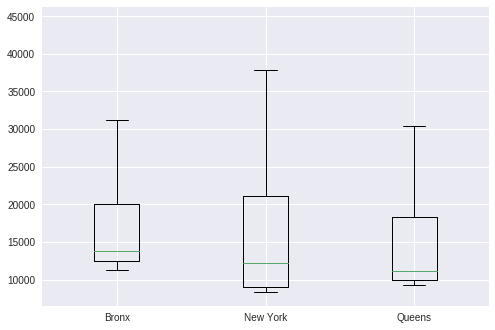

In [6]:
plt.boxplot(x=[plot_data['Violent Count'][plot_data['County']=='Bronx'],
              plot_data['Violent Count'][plot_data['County']=='New York'],
              plot_data['Violent Count'][plot_data['County']=='Queens']], 
           labels=['Bronx', 'New York', 'Queens']);

## Compute Standard Deviations and Variances of Violent Counts

In [7]:
spread = pd.concat([plot_data.std(), np.power(plot_data.std(), 2)], axis=1)
spread.columns = ['Standard Deviation', 'Variance']
spread

,Standard Deviation,Variance
Year,7.837410,6.142500e+01
Violent Count,8825.721359,7.789336e+07
Property Count,35687.143673,1.273572e+09
Population,365132.571910,1.333218e+11


## Visualize Spread of Violent Counts with Bee Swarm Plot

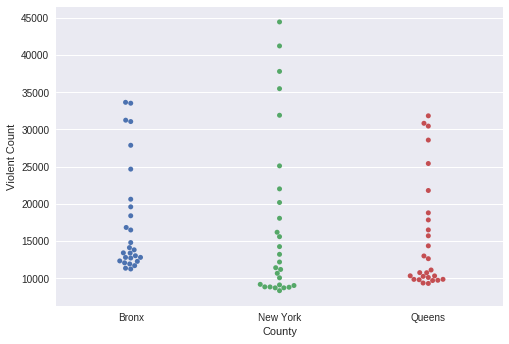

In [8]:
sns.swarmplot(y=plot_data['Violent Count'], x=plot_data['County']);

## Analyzing Covariances and Correlations

In [9]:
year_data = plot_data[plot_data['Year']==2016]
year_data

,County,Year,Violent Count,Property Count,Population
54,Bronx,2016,13817,23017,1458255.0
810,New York,2016,8839,37814,1647694.0
1080,Queens,2016,9356,24444,2343667.0


As there is only one entry per county, per year, we cannot perform valid analysis on the correlation between `Population` and `Violent Count` at the resolution of individual counties. Instead, I will perform the analysis across years and counties.

### Across years for Bronx, New York and Queens

In [0]:
bronx = plot_data[plot_data['County']=='Bronx']
ny = plot_data[plot_data['County']=='New York']
queens = plot_data[plot_data['County']=='Queens']

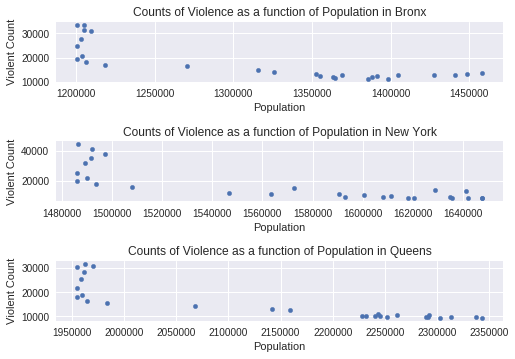

In [11]:
fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(hspace=1)

for i, city, label in zip(range(3), [bronx, ny, queens], ['Bronx', 'New York', 'Queens']):
    axs[i].scatter(x=city['Population'], y=city['Violent Count'], s=20)
    axs[i].set(title='Counts of Violence as a function of Population in {}'.format(label),
               xlabel='Population', ylabel='Violent Count')

For all three counties, counts of violent crimes are negatively correlated with population, so the off-diagonal of the covariance matrix of the two variables should be negative.

In [12]:
mb, mn, mq = (bronx[['Violent Count', 'Population']].as_matrix(),
             ny[['Violent Count', 'Population']].as_matrix(),
             queens[['Violent Count', 'Population']].as_matrix())

covariance_mb, covariance_mn, covariance_mq = np.cov(mb.T), np.cov(mn.T), np.cov(mq.T)

cov_b, cov_n, cov_q = (covariance_mb[0,1],
                       covariance_mn[0,1],
                       covariance_mq[0,1])


pd.DataFrame([cov_b, cov_n, cov_q], columns=['Covariance'], index=['Bronx', 'New York', 'Queens'])

,Covariance
Bronx,-5.635075e+08
New York,-5.700215e+08
Queens,-9.730098e+08


The correlation coefficient between the two variables is just their correlation scaled by the product of their variances. It can also be directly calculated with [`np.corrcoef`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.corrcoef.html)

In [13]:
cor_b, cor_n, cor_q = np.corrcoef(mb.T)[0,1], np.corrcoef(mn.T)[0,1], np.corrcoef(mq.T)[0,1]

pd.DataFrame([cor_b, cor_n, cor_q], columns=['Correlation Coefficient'], index=['Bronx', 'New York', 'Queens'])

,Correlation Coefficient
Bronx,-0.802718
New York,-0.801326
Queens,-0.847130


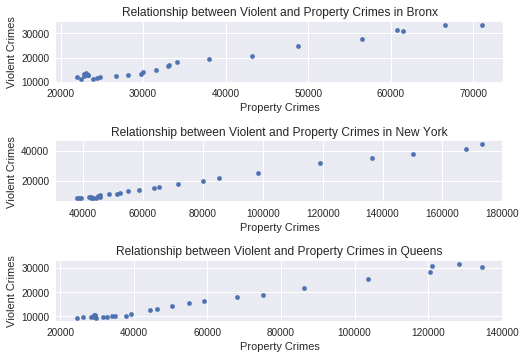

In [14]:
fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(hspace=1)

for i, city, label in zip(range(3), [bronx, ny, queens], ['Bronx', 'New York', 'Queens']):
    axs[i].scatter(x=city['Property Count'], y=city['Violent Count'], s=20)
    axs[i].set(title='Relationship between Violent and Property Crimes in {}'.format(label),
               xlabel='Property Crimes', ylabel='Violent Crimes')

For all three counties, counts of violent crimes are positively correlated with counts of property crimes.

In [15]:
mb, mn, mq = (bronx[['Violent Count', 'Property Count']].as_matrix(),
             ny[['Violent Count', 'Property Count']].as_matrix(),
             queens[['Violent Count', 'Property Count']].as_matrix())

covariance_mb, covariance_mn, covariance_mq = np.cov(mb.T), np.cov(mn.T), np.cov(mq.T)

cov_b, cov_n, cov_q = (covariance_mb[0,1],
                       covariance_mn[0,1],
                       covariance_mq[0,1])


pd.DataFrame([cov_b, cov_n, cov_q], columns=['Covariance'], index=['Bronx', 'New York', 'Queens'])

,Covariance
Bronx,1.128923e+08
New York,4.607524e+08
Queens,2.660459e+08


In [16]:
cor_b, cor_n, cor_q = np.corrcoef(mb.T)[0,1], np.corrcoef(mn.T)[0,1], np.corrcoef(mq.T)[0,1]

pd.DataFrame([cor_b, cor_n, cor_q], columns=['Correlation Coefficient'], index=['Bronx', 'New York', 'Queens'])

,Correlation Coefficient
Bronx,0.990072
New York,0.997466
Queens,0.994851


### Across Counties in 2016

We can repeat the analysis across all counties for the year of 2016.

In [17]:
data_year = data[data['Year']==2016]
print(data_year.shape)
data_year.head()

(62, 5)


,County,Year,Violent Count,Property Count,Population
0,Albany,2016,1102,7662,308401.0
27,Allegany,2016,80,490,46858.0
54,Bronx,2016,13817,23017,1458255.0
81,Broome,2016,639,4766,194518.0
108,Cattaraugus,2016,138,1087,75126.0


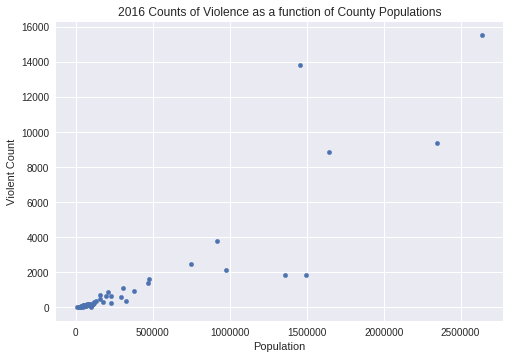

In [18]:
fig = plt.figure()
ax = fig.subplots()

ax.scatter(x=data_year['Population'], y=data_year['Violent Count'], s=20)
ax.set(title='2016 Counts of Violence as a function of County Populations',
      xlabel='Population',
      ylabel='Violent Count');

The two features appear to be positively correlated, so they should have positive off-diagonals in their covariance matrix.

In [0]:
m = data_year[['Violent Count', 'Population']].as_matrix()

In [20]:
covariance_m = np.cov(m.T)

covariance = covariance_m[0, 1]
print('\nCovariance:', covariance)


Covariance: 1478195797.6991012


In [21]:
print('Correlation Coefficient', np.corrcoef(m.T)[0,1])

Correlation Coefficient 0.8863417242702395


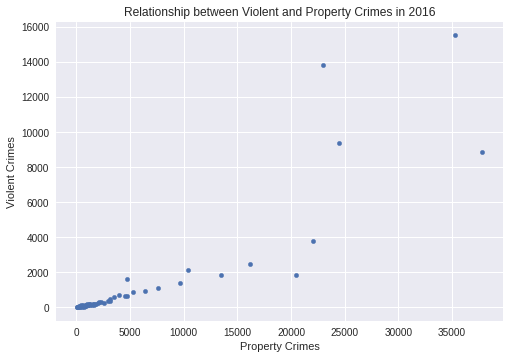

In [22]:
fig = plt.figure()
ax = fig.subplots()

ax.scatter(x=data_year['Property Count'], y=data_year['Violent Count'], s=20)
ax.set(title='Relationship between Violent and Property Crimes in 2016',
      xlabel='Property Crimes',
      ylabel='Violent Crimes');

We also expect these two features to have positive covariance.

In [23]:
m = data_year[['Violent Count', 'Property Count']].as_matrix()
covariance_m = np.cov(m.T)

covariance = covariance_m[0,1]
print('\nCovariance:', covariance)
print('Correlation Coeeficient:', np.corrcoef(m.T)[0,1])


Covariance: 21898205.88683238
Correlation Coeeficient: 0.8802287136376333
